In [2]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window
import statsmodels.api as sm
file1 = 'https://raw.githubusercontent.com/anair1996/mine/main/clean.csv'
Data1 = pd.read_csv(file1,header=0)  #creates a dataframe
Data1=Data1.drop('Unnamed: 0',axis=1)
print(Data1.shape)

#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")




Num = ['LoanPayoffPeriodInMonths','RequestedAmount','InterestRate','YearsAtCurrentEmployer','YearsInCurrentResidence','Age','NumberOfDependantsIncludingSelf','CurrentOpenLoanApplications']
Cat = ['LoanReason','Co-Applicant','RentOrOwnHome','TypeOfCurrentEmployment','CheckingAccountBalance','DebtsPaid','SavingsAccountBalance']
Target = 'WasTheLoanApproved'

Mounted at /gdrive
/gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(515, 17)


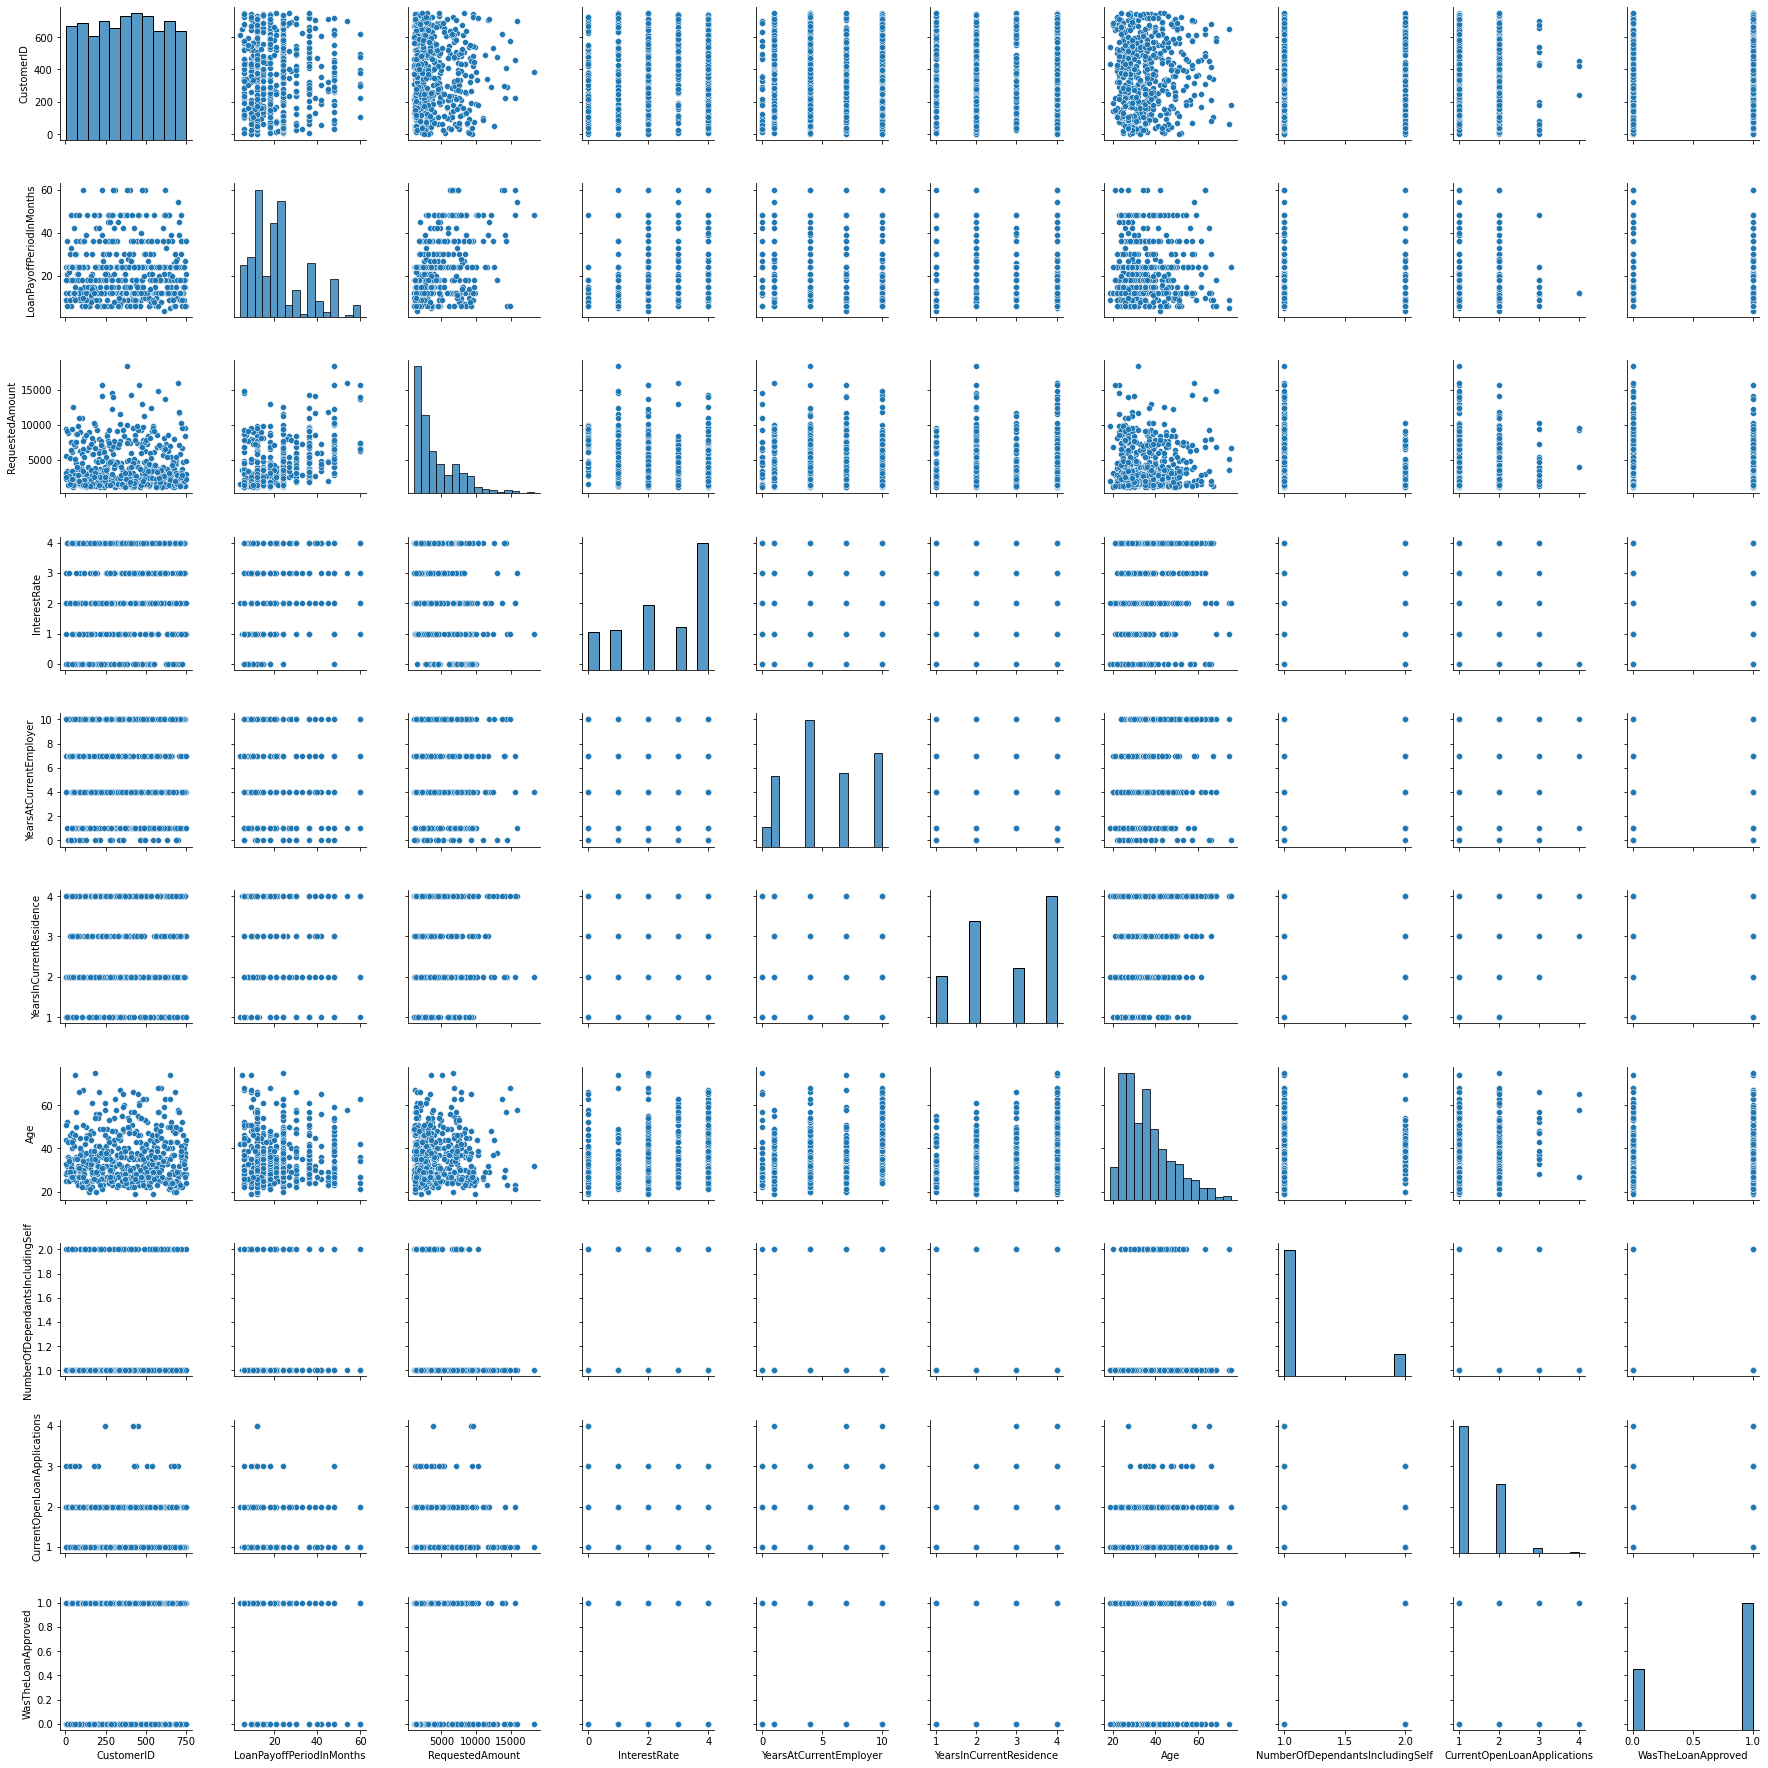

In [3]:
data = Data1.copy( deep=False)
sns.pairplot(data)
plt.show()

In [4]:
data.describe()

,CustomerID,LoanPayoffPeriodInMonths,RequestedAmount,InterestRate,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,NumberOfDependantsIncludingSelf,CurrentOpenLoanApplications,WasTheLoanApproved
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,377.091262,21.533981,4137.396117,2.574757,5.295146,2.790291,36.019417,1.151456,1.411650,0.675728
std,213.424226,12.602433,3128.287929,1.431899,3.366445,1.103013,11.218541,0.358842,0.576333,0.468557
min,2.000000,4.000000,1024.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,195.500000,12.000000,1663.500000,1.500000,4.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,380.000000,18.000000,2996.000000,3.000000,4.000000,3.000000,34.000000,1.000000,1.000000,1.000000
75%,554.500000,26.500000,6046.000000,4.000000,7.000000,4.000000,43.000000,1.000000,2.000000,1.000000
max,750.000000,60.000000,18424.000000,4.000000,10.000000,4.000000,75.000000,2.000000,4.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   CustomerID                       515 non-null    int64 
 1   LoanPayoffPeriodInMonths         515 non-null    int64 
 2   LoanReason                       515 non-null    object
 3   RequestedAmount                  515 non-null    int64 
 4   InterestRate                     515 non-null    int64 
 5   Co-Applicant                     515 non-null    object
 6   YearsAtCurrentEmployer           515 non-null    int64 
 7   YearsInCurrentResidence          515 non-null    int64 
 8   Age                              515 non-null    int64 
 9   RentOrOwnHome                    515 non-null    object
 10  TypeOfCurrentEmployment          515 non-null    object
 11  NumberOfDependantsIncludingSelf  515 non-null    int64 
 12  CheckingAccountBalance           515

Univariate Analysis

In [6]:
fig = px.scatter_matrix(data["RequestedAmount"])
fig.update_layout(width=700,height=400)
fig.show()

In [7]:
fig = px.scatter_matrix(data["LoanPayoffPeriodInMonths"])
fig.update_layout(width=700,height=400)
fig.show()

In [8]:


print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["LoanPayoffPeriodInMonths"]))
print("CoapplicantIncome: ",np.mean(data["InterestRate"]))
print("LoanAmount: ",np.mean(data["RequestedAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["LoanPayoffPeriodInMonths"])[0])
print("CoapplicantIncome: ",stats.mode(data["InterestRate"])[0])
print("LoanAmount: ",stats.mode(data["RequestedAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["LoanPayoffPeriodInMonths"]))
print("CoapplicantIncome: ",np.median(data["InterestRate"]))
print("LoanAmount: ",np.median(data["RequestedAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["LoanPayoffPeriodInMonths"]))
print("CoapplicantIncome: ",np.std(data["InterestRate"]))
print("LoanAmount: ",np.std(data["RequestedAmount"]))

fig = px.histogram(data["LoanPayoffPeriodInMonths"],x ="LoanPayoffPeriodInMonths" ,y = "LoanPayoffPeriodInMonths" )
fig.update_layout(title="LoanPayoffPeriodInMonths")
fig.show()

fig = px.histogram(data["InterestRate"],x ="InterestRate" ,y = "InterestRate" )
fig.update_layout(title="InterestRate")
fig.show()

fig = px.histogram(data["RequestedAmount"],x ="RequestedAmount" ,y = "RequestedAmount" )
fig.update_layout(title="RequestedAmount")
fig.show()



Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  21.533980582524272
CoapplicantIncome:  2.574757281553398
LoanAmount:  4137.396116504854

Mode:->

ApplicantIncome:  [12]
CoapplicantIncome:  [4]
LoanAmount:  [1169]

Median:->

ApplicantIncome:  18.0
CoapplicantIncome:  3.0
LoanAmount:  2996.0

Standard Deviation:->

ApplicantIncome:  12.590191539047924
CoapplicantIncome:  1.4305079854469738
LoanAmount:  3125.2492806802934


In [9]:
plt.figure(figsize=(10,5))
fig = px.bar(data,x=data["LoanReason"])
fig.show()

fig = px.bar(data,x=data["TypeOfCurrentEmployment"])
fig.show()

fig = px.bar(data,x=data["RentOrOwnHome"],color="RentOrOwnHome")
fig.show()

fig = px.bar(data,x=data["YearsAtCurrentEmployer"])
fig.show()

fig = px.bar(data,x=data["YearsInCurrentResidence"])
fig.show()

fig = px.bar(data,x=data["CheckingAccountBalance"])
fig.show()

fig = px.bar(data,x=data["SavingsAccountBalance"],color="SavingsAccountBalance")
fig.show()


fig = px.bar(data,x=data["WasTheLoanApproved"],color="WasTheLoanApproved")
fig.show()
fig.show()

<Figure size 720x360 with 0 Axes>

In [10]:
print(data["WasTheLoanApproved"].value_counts())
print(data["RequestedAmount"].value_counts())
print(data["InterestRate"].value_counts())
print(data["YearsAtCurrentEmployer"].value_counts())
print(data["YearsInCurrentResidence"].value_counts())
print(data["Age"].value_counts())
print(data["NumberOfDependantsIncludingSelf"].value_counts())
print(data["CurrentOpenLoanApplications"].value_counts())
print(data["LoanReason"].value_counts())
print(data["Co-Applicant"].value_counts())
print(data["RentOrOwnHome"].value_counts())
print(data["TypeOfCurrentEmployment"].value_counts())
print(data["CheckingAccountBalance"].value_counts())
print(data["DebtsPaid"].value_counts())
print(data["LoanPayoffPeriodInMonths"].value_counts())

1    348
0    167
Name: WasTheLoanApproved, dtype: int64
2764     2
1386     2
1382     2
1533     2
1410     2
2978     2
1546     2
1940     2
1935     2
6761     2
6094     2
1919     2
1169     2
7274     2
5954     2
1597     2
1344     2
2631     2
1424     2
8024     2
1503     2
4843     2
1275     2
3077     2
1258     2
1449     2
2359     1
1322     1
2301     1
1323     1
2348     1
1330     1
1331     1
7418     1
7476     1
1333     1
1289     1
12389    1
15672    1
6458     1
7485     1
14896    1
2366     1
1343     1
4151     1
3394     1
7409     1
11560    1
8487     1
7228     1
2329     1
3342     1
7432     1
8463     1
6416     1
1285     1
3345     1
4370     1
9514     1
2325     1
2327     1
6404     1
2303     1
1308     1
1347     1
1271     1
6403     1
1311     1
1282     1
2337     1
12579    1
5096     1
1318     1
1309     1
2132     1
3398     1
9629     1
4484     1
1413     1
1414     1
6832     1
5371     1
8588     1
2445     1
1422     1
1138    

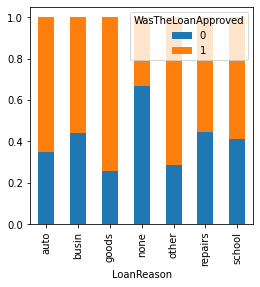

In [12]:
Num = ['LoanPayoffPeriodInMonths','RequestedAmount','InterestRate','YearsAtCurrentEmployer','YearsInCurrentResidence','Age','NumberOfDependantsIncludingSelf','CurrentOpenLoanApplications']
Cat = ['LoanReason','Co-Applicant','RentOrOwnHome','TypeOfCurrentEmployment','CheckingAccountBalance','DebtsPaid','SavingsAccountBalance']
Target = 'WasTheLoanApproved'

Reason=pd.crosstab(data['LoanReason'],data['WasTheLoanApproved'])
Reason.div(Reason.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

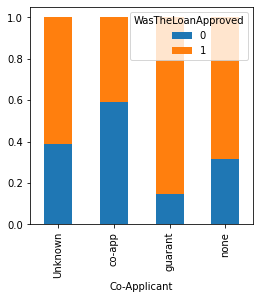

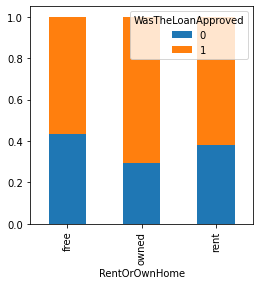

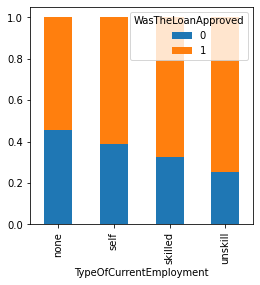

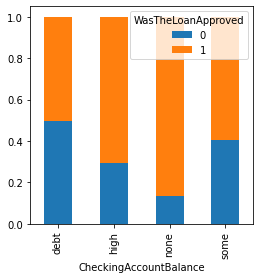

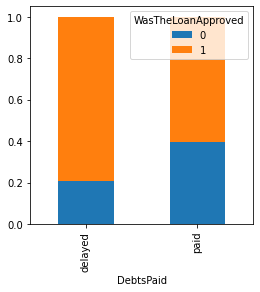

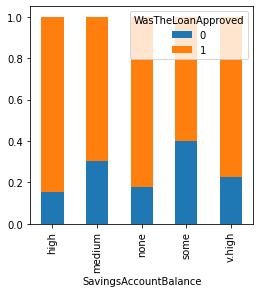

In [13]:
Co=pd.crosstab(data['Co-Applicant'],data['WasTheLoanApproved'])
Co.div(Co.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))
R=pd.crosstab(data['RentOrOwnHome'],data['WasTheLoanApproved'])
R.div(R.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))
Tye=pd.crosstab(data['TypeOfCurrentEmployment'],data['WasTheLoanApproved'])
Tye.div(Tye.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))
Reason1=pd.crosstab(data['CheckingAccountBalance'],data['WasTheLoanApproved'])
Reason1.div(Reason1.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))
Reason2=pd.crosstab(data['DebtsPaid'],data['WasTheLoanApproved'])
Reason2.div(Reason2.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))
Reason3=pd.crosstab(data['SavingsAccountBalance'],data['WasTheLoanApproved'])
Reason3.div(Reason3.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

Bivariate Analysis

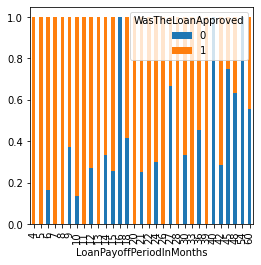

In [15]:
#Num = ['LoanPayoffPeriodInMonths','RequestedAmount','InterestRate','YearsAtCurrentEmployer','YearsInCurrentResidence','Age','NumberOfDependantsIncludingSelf','CurrentOpenLoanApplications']
Co1=pd.crosstab(data['LoanPayoffPeriodInMonths'],data['WasTheLoanApproved'])
Co1.div(Co1.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

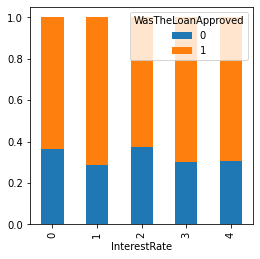

In [31]:
Co2=pd.crosstab(data['InterestRate'],data['WasTheLoanApproved'])
Co2.div(Co2.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

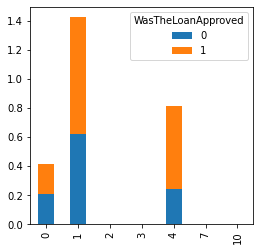

In [32]:
Co3=pd.crosstab(data['YearsAtCurrentEmployer'],data['WasTheLoanApproved'])
Co3.div(Co2.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

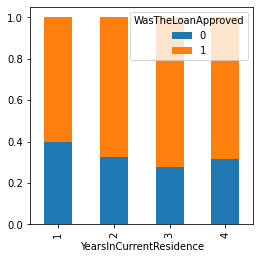

In [33]:

Co4=pd.crosstab(data['YearsInCurrentResidence'],data['WasTheLoanApproved'])
Co4.div(Co4.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

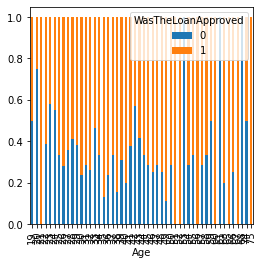

In [34]:
Co5=pd.crosstab(data['Age'],data['WasTheLoanApproved'])
Co5.div(Co5.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

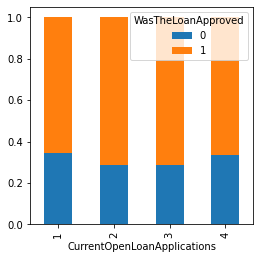

In [37]:
Co7=pd.crosstab(data['CurrentOpenLoanApplications'],data['WasTheLoanApproved'])
Co7.div(Co7.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))

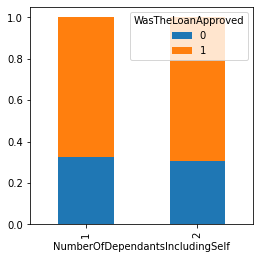

In [38]:
Co7=pd.crosstab(data['NumberOfDependantsIncludingSelf'],data['WasTheLoanApproved'])
Co7.div(Co7.sum(1).astype(float), axis=0).plot(kind="bar",
stacked=True, figsize=(4,4))